<a href="https://colab.research.google.com/github/Abhinav4518/Abhinav4518/blob/main/Task2Level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
print("Step 1: Loading the California Housing dataset...")
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # The target variable
print("Dataset loaded successfully.\n")

Step 1: Loading the California Housing dataset...
Dataset loaded successfully.



In [3]:
print("Step 2: Performing Exploratory Data Analysis (EDA)...")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary:")
print(df.describe())
print("\nChecking for missing values:")
print(df.isnull().sum())
print("EDA complete.\n")

Step 2: Performing Exploratory Data Analysis (EDA)...
First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  fl

In [4]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")


Data split into training (16512 rows) and testing (4128 rows) sets.


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.\n")


Linear Regression model trained successfully.



In [7]:
y_pred = model.predict(X_test)


In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [9]:
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print("A lower RMSE and a higher R² (closer to 1) indicate a better model fit.")
print("Model evaluation complete.\n")


Root Mean Squared Error (RMSE): 0.7456
R-squared (R²): 0.5758
A lower RMSE and a higher R² (closer to 1) indicate a better model fit.
Model evaluation complete.



Saved actual_vs_predicted.png


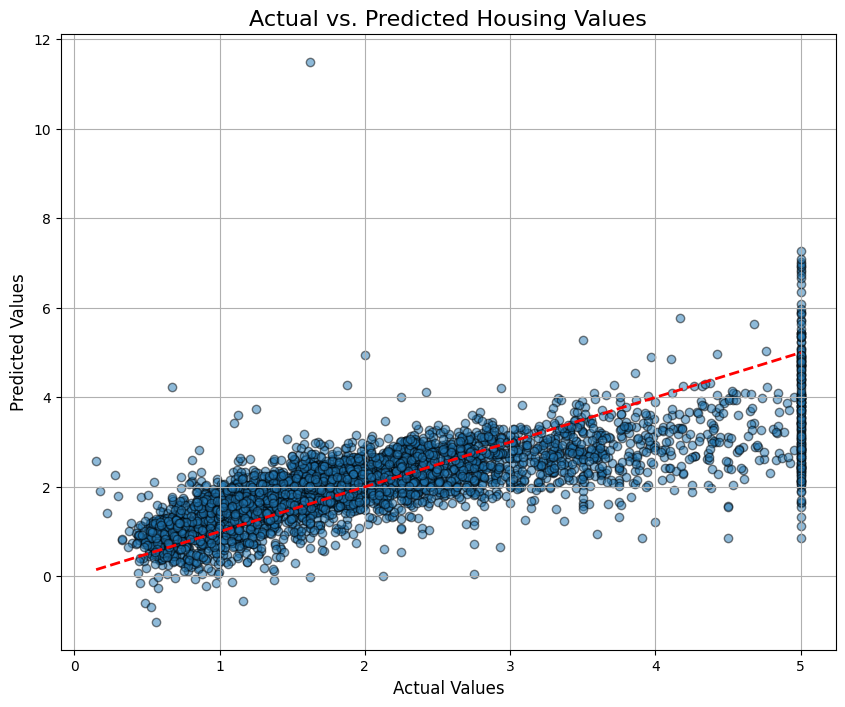

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs. Predicted Housing Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
print("Saved actual_vs_predicted.png")

Saved residual_plot.png

Visualizations generated. Script finished.


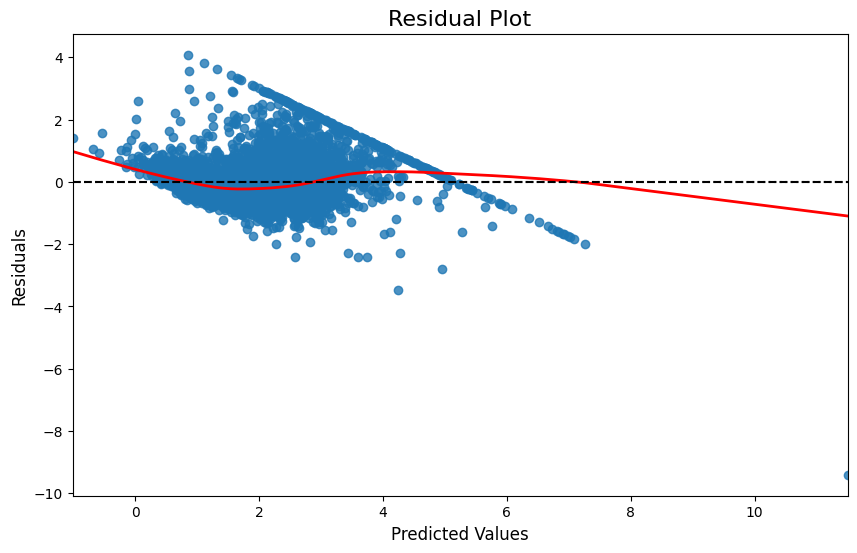

In [11]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--')
plt.savefig('residual_plot.png')
print("Saved residual_plot.png")

print("\nVisualizations generated. Script finished.")